In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Setting a seed value
np.random.seed(42)

# Taking random sample of 25 observations
sample_data = data.sample(n=25)


In [40]:
sample_data.head()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [24]:
#(a) mean and max of glucose values
mean_glucose = data['Glucose'].mean()
highest_glucose = data['Glucose'].max()

#sample data
sample_mean_glucose = sample_data['Glucose'].mean()
sample_highest_glucose = sample_data['Glucose'].max()

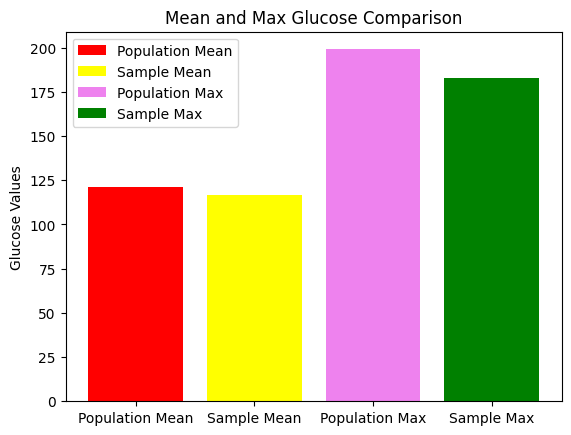

In [23]:
#charts to compare mean and max of glucose values for both sample and population data

categories = ['Population Mean', 'Sample Mean','Population Max', 'Sample Max']
values = [population_mean_glucose,sample_mean_glucose, population_highest_glucose, sample_highest_glucose]

# Assigning colors and labels
colors = ['red', 'yellow', 'violet', 'green']
labels = ['Population Mean', 'Sample Mean', 'Population Max', 'Sample Max']

bars = plt.bar(categories, values, color=colors)
plt.title('Mean and Max Glucose Comparison')
plt.ylabel('Glucose Values')

# Adding legend
plt.legend(bars, labels, loc='upper left')

plt.show()

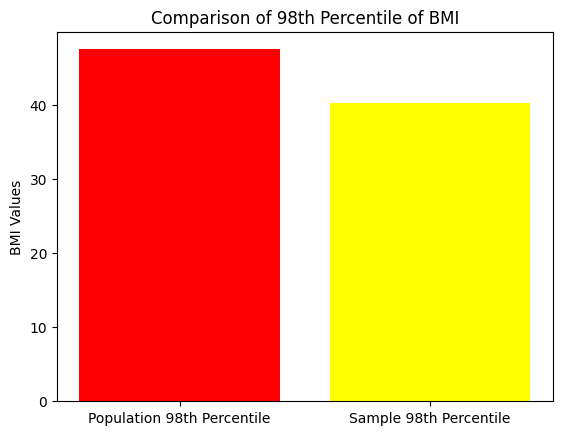

In [26]:
#(b) Comparing results of 98th percentile of BMI of your sample and the population
population_percentile_98 = np.percentile(data['BMI'], 98)
sample_percentile_98 = np.percentile(sample_data['BMI'], 98)
categories = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percentile_98, sample_percentile_98]

plt.bar(categories, values, color=['red', 'yellow'])
plt.title('Comparison of 98th Percentile of BMI')
plt.ylabel('BMI Values')
plt.show()

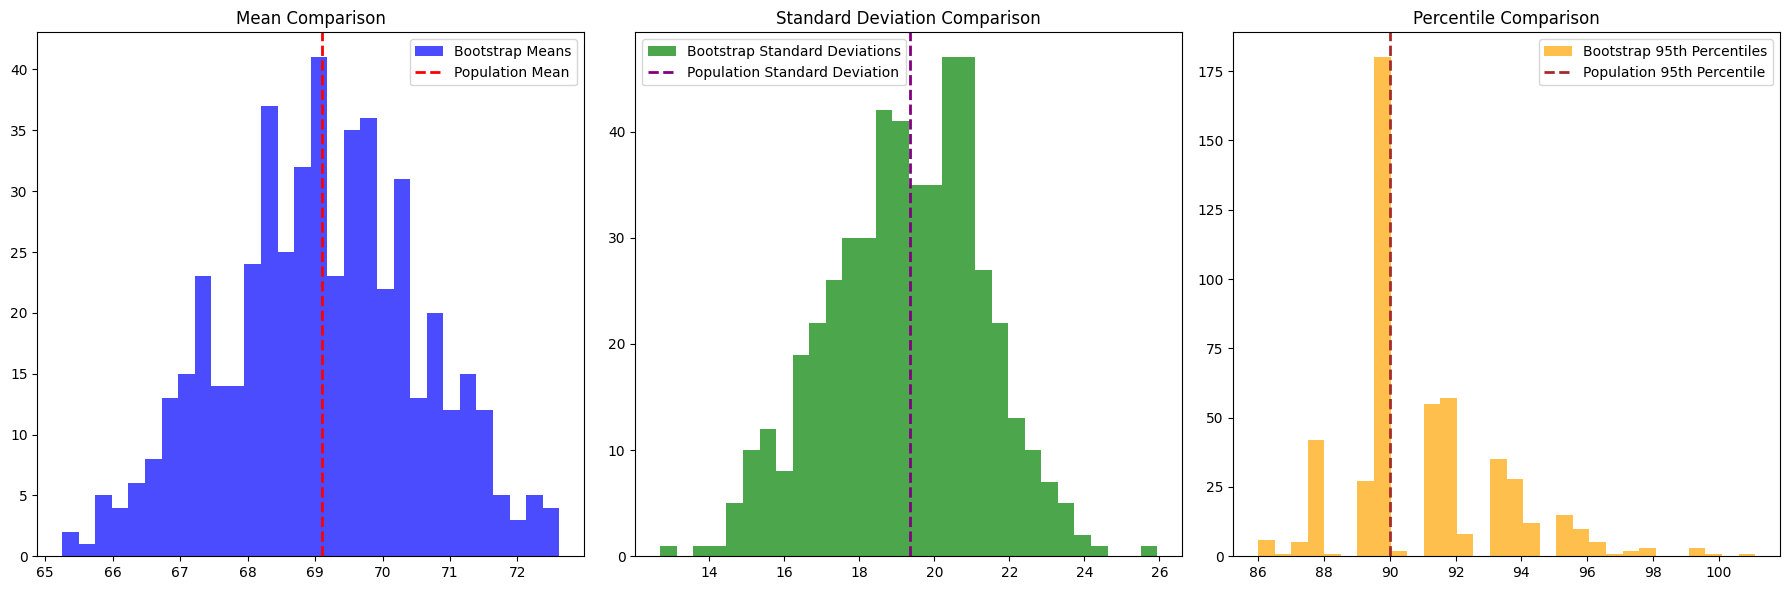

In [28]:
#(c)# # Number of bootstrap samples and size of each sample
num_bootstrap_samples = 500
sample_size = 150

# Initialize empty arrays to store bootstrap statistics
bootstrap_means = np.zeros(num_bootstrap_samples)
bootstrap_std_devs = np.zeros(num_bootstrap_samples)
bootstrap_percentiles = np.zeros(num_bootstrap_samples)

# Bootstrap resampling
for i in range(num_bootstrap_samples):
    bootstrap_sample = data['BloodPressure'].sample(n=sample_size, replace=True)

    # Calculate statistics for each bootstrap sample
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 95)  # Using 95th percentile for comparison

# Calculate statistics for the population
population_mean = data['BloodPressure'].mean()
population_std_dev = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 95)  # Using 95th percentile for comparison

# Create side-by-side subplots for comparison
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Mean comparison
axes[0].hist(bootstrap_means, bins=30, color='blue', alpha=0.7, label='Bootstrap Means')
axes[0].axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
axes[0].set_title('Mean Comparison')
axes[0].legend()

# Standard deviation comparison
axes[1].hist(bootstrap_std_devs, bins=30, color='green', alpha=0.7, label='Bootstrap Standard Deviations')
axes[1].axvline(population_std_dev, color='purple', linestyle='dashed', linewidth=2, label='Population Standard Deviation')
axes[1].set_title('Standard Deviation Comparison')
axes[1].legend()

# Percentile comparison
axes[2].hist(bootstrap_percentiles, bins=30, color='orange', alpha=0.7, label='Bootstrap 95th Percentiles')
axes[2].axvline(population_percentile, color='brown', linestyle='dashed', linewidth=2, label='Population 95th Percentile')
axes[2].set_title('Percentile Comparison')
axes[2].legend()

plt.tight_layout()
plt.show()